---
title: Michelson Interferometers
date: 2025-01-28
authors:
  - name: Craig Cahillane
    orcid: 0000-0002-3888-314X
    affiliations:
      - Syracuse University
numbering:
  heading_1: true
  heading_2: true
  heading_3: true
---

A Michelson interferometer holds a special place in history.\
The its inventors, Michelson and Morley, used the interferometer to disprove the existance of a dispersive ether modulating light in our universe.\
Now, we use the Michelson interferometer as the fundamental building block of modern gravitational wave detectors.\
Today, we will overview the basics of the Michelson.

# Michelson Topology

A Michelson interferometer is the second least-complicated non-trivial interferometer behind the Fabry-Perot.\
It does not have any recycling elements, i.e. no electric fields feed back to themselves, there are no loops in the graph.

A Michelson consists of a beamsplitter, typically 50:50, and two mirrors with reflectivity $r_x$ and $r_y$ which reflect the laser back to the beamsplitter.\
The space between mirror and beamsplitter are called *arms*.\


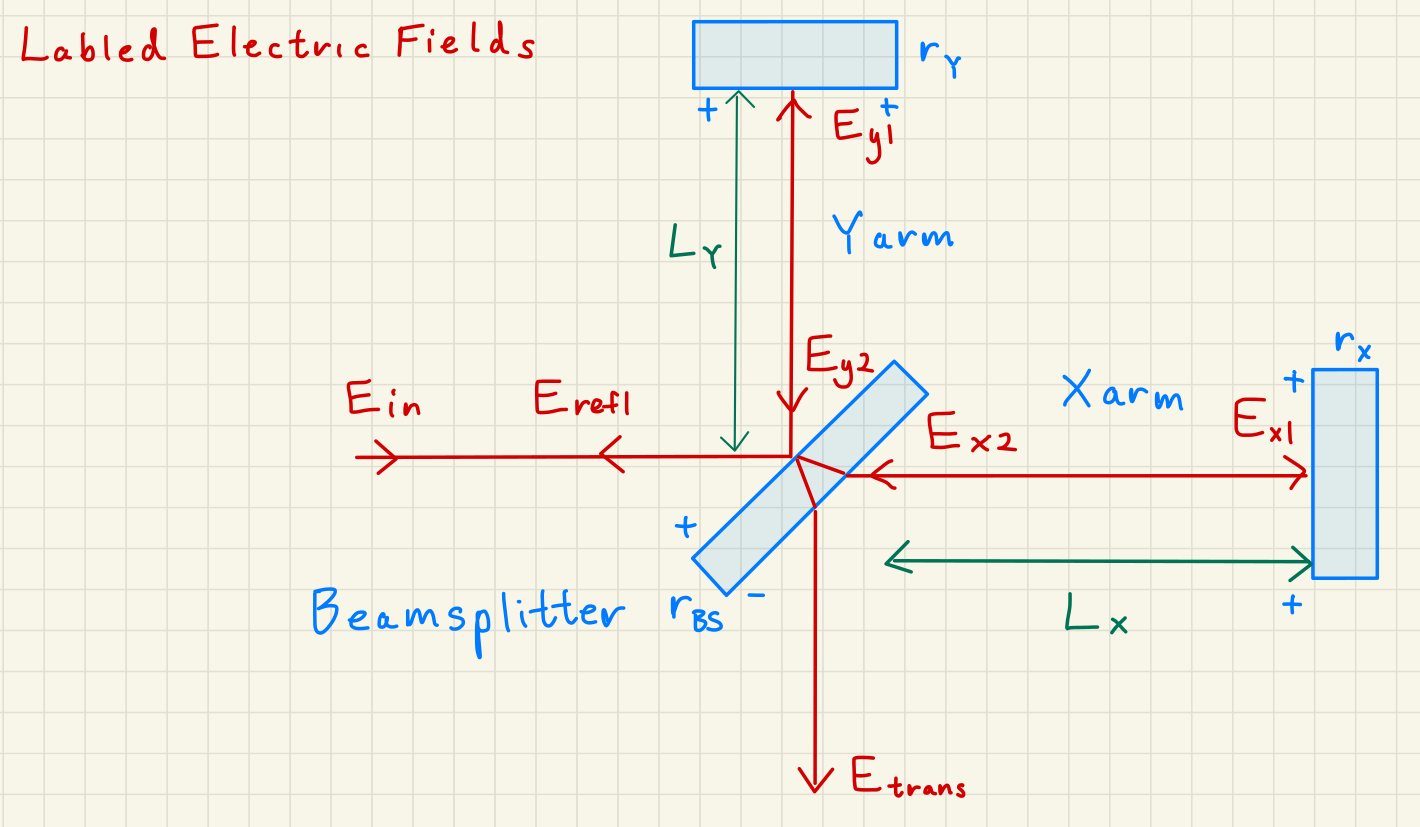

Michelson interferometer topology with electric fields labeled.

# Michelson Field Equations
If we assume plane-wave solutions to the Michelson $E_\mathrm{in} = E_0 e^{i \omega_0 t}$, 
and employ our propogating and mirror transition matrices,
we can write the following system of equations:
\begin{align}
\label{eq:michelson_system_of_equations}
E_\mathrm{x1} &= t_\mathrm{bs} e^{-i k L_x} E_\mathrm{in}\\
E_\mathrm{y1} &= -r_\mathrm{bs} e^{-i k L_y} E_\mathrm{in}\\
E_\mathrm{x2} &= -r_x e^{-i k L_x} E_\mathrm{x1}\\
E_\mathrm{y2} &= -r_y e^{-i k L_y} E_\mathrm{y1}\\
E_\mathrm{refl}  &= t_\mathrm{bs} E_\mathrm{x2} - r_\mathrm{bs} E_\mathrm{y2} \\
E_\mathrm{trans} &= r_\mathrm{bs} E_\mathrm{x2} + t_\mathrm{bs} E_\mathrm{y2} \\
\end{align}
where $E_\mathrm{refl}$ is the reflected, or *symmetric* port,\
and $E_\mathrm{trans}$ is the transmitted, or *antisymmetric* port.

I may switch haphazardly between $E_\mathrm{trans} = E_\mathrm{as}$.\
The term *antisymmetric* refers to how many reflections and transmissions the beam experiences.\
The *symmetric* beam $E_\mathrm{refl}$ receives either two reflections or two transmissions, depending on which arm you focus on.\
The *antisymmetric* beam gets one reflection and transmission, no matter the arm you focus on.

We can use the optical diagram to draw a directed graph of the Michelson below.

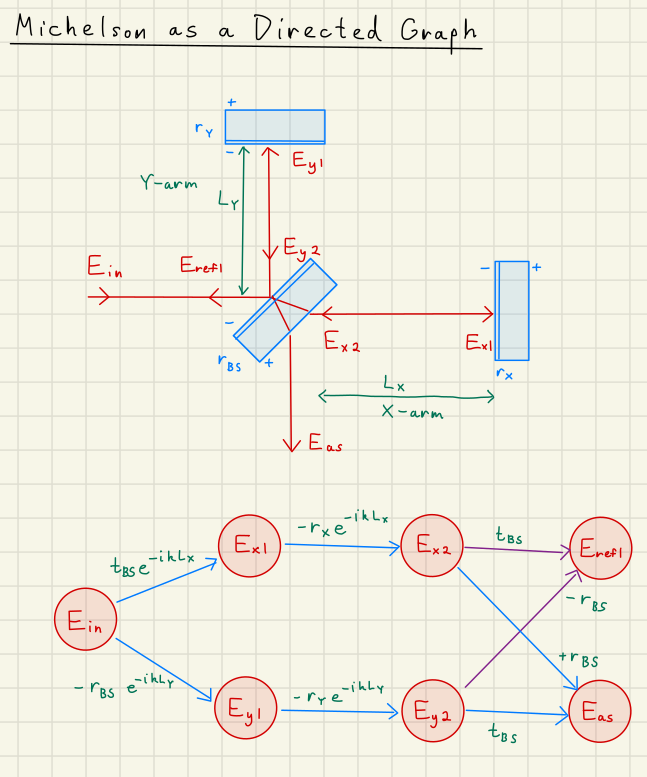

Michelson directed graphs

```{exercise}
:label: michelson-adjacency-matrix-exercise

Write out an adjacency matrix for the Michelson interferometer.

Find the transfer functions $\dfrac{E_\mathrm{refl}}{E_\mathrm{in}}$ and $\dfrac{E_\mathrm{trans}}{E_\mathrm{x1}}$.
```

```{solution} michelson-adjacency-matrix-exercise
:label: michelson-adjacency-matrix-exercise-solution
:class: dropdown

First, the electric field state vector is 
\begin{align}
\boldsymbol{E} = \begin{bmatrix}
E_\mathrm{in} &
E_\mathrm{x1} &
E_\mathrm{y1} &
E_\mathrm{x2} &
E_\mathrm{y2} &
E_\mathrm{refl} &
E_\mathrm{trans}
\end{bmatrix}^T
\end{align}

Then the adjacency matrix $\boldsymbol{M}$ becomes:
\begin{align}
\begin{array}{cccc}
\boldsymbol{E}_{n+1} & = & \boldsymbol{M} &\boldsymbol{E}_{n} \\~\\
\begin{bmatrix}
E_\mathrm{in} \\
E_\mathrm{x1} \\
E_\mathrm{y1} \\
E_\mathrm{x2} \\
E_\mathrm{y2} \\
E_\mathrm{refl} \\
E_\mathrm{trans}
\end{bmatrix}_{n+1}
&=&
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 t_\mathrm{bs} e^{-i k L_x} & 0 & 0 & 0 & 0 & 0 & 0 \\
-r_\mathrm{bs} e^{-i k L_y} & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & r_x e^{-i k L_x} & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & r_y e^{-i k L_y} & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & t_\mathrm{bs} & -r_\mathrm{bs} & 0 & 0 \\
0 & 0 & 0 & r_\mathrm{bs} & t_\mathrm{bs} & 0 & 0 \\
\end{bmatrix} 
&\begin{bmatrix}
E_\mathrm{in} \\
E_\mathrm{x1} \\
E_\mathrm{y1} \\
E_\mathrm{x2} \\
E_\mathrm{y2} \\
E_\mathrm{refl} \\
E_\mathrm{trans}
\end{bmatrix}_{n}
\end{array}
\end{align}

Inverting the identity matrix minus the adjacency matrix gives us the steady state transfer functions for each of the electric fields:
\begin{align}
\label{eq:michelson_tf_matrix}
\boldsymbol{(I - M)}^{-1} = 
\begin{bmatrix}
 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
 t_\mathrm{bs} e^{-i k L_x} & 1 & 0 & 0 & 0 & 0 & 0 \\
 -r_\mathrm{bs} e^{-i k L_y} & 0 & 1 & 0 & 0 & 0 & 0 \\
 -r_x t_\mathrm{bs} e^{-i 2 k L_x} & -r_x e^{-i k L_x} & 0 & 1 & 0 & 0 & 0 \\
 r_\mathrm{bs} r_y e^{-i 2 k L_y} & 0 & -r_y e^{-i k L_y} & 0 & 1 & 0 & 0 \\
 -r_\mathrm{bs}^2 r_y e^{-i 2 k L_y} - r_x t_\mathrm{bs}^2 e^{-i 2 k L_x} & -r_x t_\mathrm{bs} e^{-i k L_x} & r_\mathrm{bs} r_y e^{-i k L_y} & t_\mathrm{bs} & -r_\mathrm{bs} & 1 & 0 \\
 r_\mathrm{bs} r_y t_\mathrm{bs} e^{-i 2 k L_y} - r_\mathrm{bs} r_x t_\mathrm{bs} e^{-i 2 k L_x} & -r_\mathrm{bs} r_x e^{-i k L_x} & -r_y t_\mathrm{bs} e^{-i k L_y} & r_\mathrm{bs} & t_\mathrm{bs} & 0 & 1 \\
\end{bmatrix} 
\end{align}
This matrix contains all the transfer functions from one field to another.\
For instance, the transfer function from $E_\mathrm{in}$ to $E_\mathrm{refl}$ will simply be the matrix element in the first column (cooresponding to $E_\mathrm{in}$)\
and the sixth row (cooresponding to $E_\mathrm{refl}$), or matrix element $[[6,1]]$:
\begin{align}
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= \boldsymbol{(I - M)}^{-1}[[6,1]] \\
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= - r_\mathrm{bs}^2 r_y e^{-i 2 k L_y} - t_\mathrm{bs}^2 r_x e^{-i 2 k L_x}
\end{align}
Similarly:
\begin{align}
\dfrac{E_\mathrm{trans}}{E_\mathrm{x1}} &= \boldsymbol{(I - M)}^{-1}[[7,2]] \\
\dfrac{E_\mathrm{trans}}{E_\mathrm{x1}} &= -r_\mathrm{bs} r_x e^{-i k L_x}
\end{align}

```

## Solutions to the Michelson Output Fields

From our solutions to either Eq. [](#eq:michelson_system_of_equations), or from [](#michelson-adjacency-matrix-exercise-solution),\
we can solve for the symmetric and antisymmetric output fields $E_\mathrm{refl}$ and $E_\mathrm{trans}$ from the only source field $E_\mathrm{in}$: 

\begin{align}
\label{eq:output_fields}
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= -r_\mathrm{bs}^2 r_y e^{-i 2 k L_y} - t_\mathrm{bs}^2 r_x e^{-i 2 k L_x}\\
\dfrac{E_\mathrm{trans}}{E_\mathrm{in}} &= r_\mathrm{bs} t_\mathrm{bs} r_y e^{-i 2 k L_y} - r_\mathrm{bs} t_\mathrm{bs} r_x e^{-i 2 k L_x}\\
\end{align}

Let's stop here to analyze these Equations [](#eq:output_fields) briefly.


## Analysis
There are a couple of key observations we can make about the Michelson output fields.

1. **The main interference in both output fields comes from the difference in the arm lengths $L_x$ and $L_y$.**\
This represents a degree of freedom of our optical system, called the *differential arm length*, or DARM.
2. **Sign difference in the interference**\
If $L_x = L_y$, we get destructive interference at $E_\mathrm{trans}$ and constructive interference at $E_\mathrm{refl}$.\
This allows us to conserve power output from the interferometer.
4. **Perfect interference relies on matching the reflectivity of the end mirrors $r_x = r_y$, as well as having a ideal beamsplitter $r_\mathrm{bs} = t_\mathrm{bs}$.**\
Imperfect interference will lead to *contrast defect*, a crucial parameter for interferometers.
5. **No matter the field or frequency of the input field, the output fields will be an attenuated copy of the input field.**\
For a perfect Michelson, *common mode rejection* tends to *reflect* any changes in $E_\mathrm{in}$ back toward the input port $E_\mathrm{refl}$.\
This is ideal if we care only about motion of the mirrors from the differential degree of freedom DARM.

## Simplifications 
For a first analysis, it's common to assume some basic parameters and make some simplications of the transfer functions in Eq. [](#eq:output_fields).
\begin{align}
\label{eq:phase_xy}
\phi_x &= k L_x \\
\phi_y &= k L_y
\end{align}
represents our single-pass phase of each arm,
\begin{align}
\label{eq:bs_lossless}
r_\mathrm{bs} &= t_\mathrm{bs} = \dfrac{1}{\sqrt{2}}
\end{align}
represents the lossless, perfect 50:50 beamsplitter, and
\begin{align}
r_x = r_y \approx 1
\end{align}
represents the matched, perfectly reflecting end mirrors
\begin{align}
\label{eq:darm_common_phases}
\phi_d &= \phi_x - \phi_y\\
\phi_c &= \phi_x + \phi_y
\end{align}
are the differential phase $\phi_d$ and common phase $\phi_c$.\
Note that the differential arm *length* and phase are related like $\phi_d = k (L_x - L_y)$,
and inverting the solutions in Eq. [](#eq:darm_common_phases) yields
\begin{align}
\label{eq:arm_common_phases}
\phi_x &= \dfrac{\phi_c + \phi_d}{2}\\
\phi_y &= \dfrac{\phi_c - \phi_d}{2}
\end{align}


Applying the above simplifications to our output transfer function $E_\mathrm{in}$ to $E_\mathrm{refl}$ yields
\begin{align}
\label{eq:refl_simple_field}
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= -r_\mathrm{bs}^2 r_y e^{-i 2 k L_y} - t_\mathrm{bs}^2 r_x e^{-i 2 k L_x}\\
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= -r_\mathrm{bs}^2 r_y e^{-i 2 \phi_y} - t_\mathrm{bs}^2 r_x e^{-i 2 \phi_x}\\
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= -\dfrac{1}{2} ( e^{-i 2 \phi_y} + e^{-i 2 \phi_x} )\\
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= -\dfrac{1}{2} ( e^{-i (\phi_c - \phi_d)} + e^{-i (\phi_c + \phi_d) )} \\
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= -\dfrac{1}{2} e^{-i \phi_c} ( e^{i \phi_d} + e^{-i \phi_d} )\\
\end{align}
yields a crucial result
\begin{align}
\label{eq:simple_mich_reflection}
\boxed{ \dfrac{E_\mathrm{refl}}{E_\mathrm{in}} = - e^{-i \phi_c} \cos(\phi_d) }
\end{align}

Going through a similar derivation gives $E_\mathrm{trans}$
\begin{align}
\label{eq:simple_mich_transmission}
\boxed{ \dfrac{E_\mathrm{trans}}{E_\mathrm{in}} = - i e^{-i \phi_c} \sin(\phi_d) }
\end{align}

Equations [](#eq:simple_mich_reflection) and [](#eq:simple_mich_transmission) represent the fields at the outputs of the Michelson.\
Both fields are rotated by an arbitrary phasor $e^{-i \phi_c}$, which corresponds to the common mode length of the Michelson arms.\
Both fields amplitudes are modulated by the differential arm length $\phi_d$, 90 degrees out-of-phase with one another.\
Finally, both are rotated relative to each other by a factor of $i$, putting them in strictly different quadratures of light.

Writing Eqs. [](#eq:simple_mich_reflection) and [](#eq:simple_mich_transmission) in the quadrature picture yields
\begin{align}
\label{eq:quadrature_rep_simple_mich}
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} = - \begin{bmatrix} 
\cos{\phi_c} \\ 
\sin{\phi_c} 
\end{bmatrix}
\cos(\phi_d) \\
\dfrac{E_\mathrm{trans}}{E_\mathrm{in}} = \begin{bmatrix} 
-\sin{\phi_c} \\ 
\cos{\phi_c} 
\end{bmatrix}
\sin(\phi_d)
\end{align}
which emphasizes how the common phase $\phi_c$ rotates which quadrature the light is in,\
but has no effect on the amplitude of the light.\
The differential $\phi_d$ is the most crucial for determining whether the field is transmitted or not.

## Contrast Defect

```{exercise}
:label: michelson-simple-trans-exercise
~\
Go through the derivation for the simplified responses $\dfrac{E_\mathrm{refl}}{E_\mathrm{in}}$ and $\dfrac{E_\mathrm{trans}}{E_\mathrm{in}}$,\
but this time do not assume $r_x = r_y \approx 1$, and let $r_x$ and $r_y$ be different.
You may still assume the beamsplitter is ideal (Eq [](#eq:bs_lossless)).

*Hint:* Choose a common and differential basis for the reflectivities of $r_x$ and $r_y$.
```

```{solution} michelson-simple-trans-exercise
:label: michelson-simple-trans-exercise-solution
:class: dropdown

Start with Eq. [](#eq:output_fields), but set 
\begin{align}
r_x = r_c + r_d\\
r_y = r_c - r_d
\end{align}

This will give us, for $\dfrac{E_\mathrm{refl}}{E_\mathrm{in}}$:
\begin{align}
\label{eq:refl_with_diff_refl}
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= -r_\mathrm{bs}^2 r_y e^{-i 2 \phi_y} - t_\mathrm{bs}^2 r_x e^{-i 2 \phi_x}\\
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= -\dfrac{1}{2} (r_c - r_d) e^{-i (\phi_c - \phi_d)} -\dfrac{1}{2} (r_c + r_d) e^{-i (\phi_c + \phi_d) } \\
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= -\dfrac{1}{2} r_c (e^{-i (\phi_c - \phi_d)} + e^{-i (\phi_c + \phi_d) }) + \dfrac{1}{2} r_d (e^{-i (\phi_c - \phi_d)} - e^{-i (\phi_c + \phi_d) }) \\
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= - r_c e^{-i \phi_c} \cos{\phi_d} - i r_d e^{-i \phi_c} \sin{\phi_d} \\
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= - e^{-i \phi_c} \left( r_c \cos{\phi_d} - i r_d  \sin{\phi_d} \right) \\
\end{align}

For the last solution of [](#eq:refl_with_diff_refl), the right-hand-side's left term is the same as Eq. [](#eq:simple_mich_reflection) above.\
But the right term depends on the differential reflectivity $r_d$ which is in a different quadrature (rotated by $i$).  

A similar derivation will give $\dfrac{E_\mathrm{trans}}{E_\mathrm{in}}$:
\begin{align}
\label{eq:trans_with_diff_refl}
\dfrac{E_\mathrm{trans}}{E_\mathrm{in}} &= - e^{-i \phi_c} \left( - i r_c  \sin{\phi_d} + r_d \cos{\phi_d} \right) \\
\end{align}
which also experiences an alteration of the quadrature of light due to differential reflectivity $r_d$.

This light in the wrong quadrature due to $r_d$ is called *contrast defect*.\
Contrast defect light shows up at the antisymmetric port even when the interferometer is held perfectly on resonance, i.e. $\phi_d = 0$.\
This limits the achievable level of *common-mode rejection* in the interferometer.
It also is a cause of noise inside the interferometer, as it tends to mix with weak electric field modulations in the opposite quadrature to the signal quadrature.\
So the contrast defect field carries no useful signal about DARM, but contributes noise to the interferometer.\
We work hard to ensure our interferometer arms are well-matched in reflectivity, as well as all aspects, to limit the level of contrast defect.
```

## Michelson Phasors

# Michelson Power